In [6]:
import logomaker
import pickle
import math
import matplotlib.pyplot as plt

def plot_clusters_logos(clusters, rows):
    n = len(clusters)
    print(len(rows))
    fig = plt.figure(figsize=(10,30), constrained_layout= True)
    for i, cluster in enumerate(clusters):
        ax = plt.subplot2grid((n,4), (i,0), colspan=3)
        peptides = clusters[cluster]
        peptides_matrix = logomaker.alignment_to_matrix(sequences = peptides, to_type="probability")
        lm = logomaker.Logo(
            peptides_matrix,
            fade_probabilities = True,
            stack_order= "small_on_top",
            ax=ax
        )
        lm.highlight_position(1)
        lm.highlight_position(8)
        ax.set_title(f"cluster title: {cluster} \n number of peptides: {len(peptides)}")
        ax.set_ylabel("probability")
        ax.set_xlabel("residue number")

        positive_entries = [float(row[4]) for row in rows if row[1] in peptides and float(row[4]) < 500]
        negative_entries = [float(row[4]) for row in rows if row[1] in peptides and float(row[4]) > 500]
        ax = plt.subplot2grid((n,4), (i,3))
        plt.bar(["Positive", "Negative"], [len(positive_entries), len(negative_entries)])
        ax.set_title(f" {len(positive_entries)/len(negative_entries):.2f} pos/neg ratio \n At BA < 500")
    plt.show()

In [3]:

with open("/projects/0/einf2380/data/external/processed/II/IDs_BA_DRB10101_MHCII_15mers.csv", "r") as csv_f:
    rows = [row.replace("\n", "").split(",") for row in csv_f];
    print(len(rows))


8354


8354


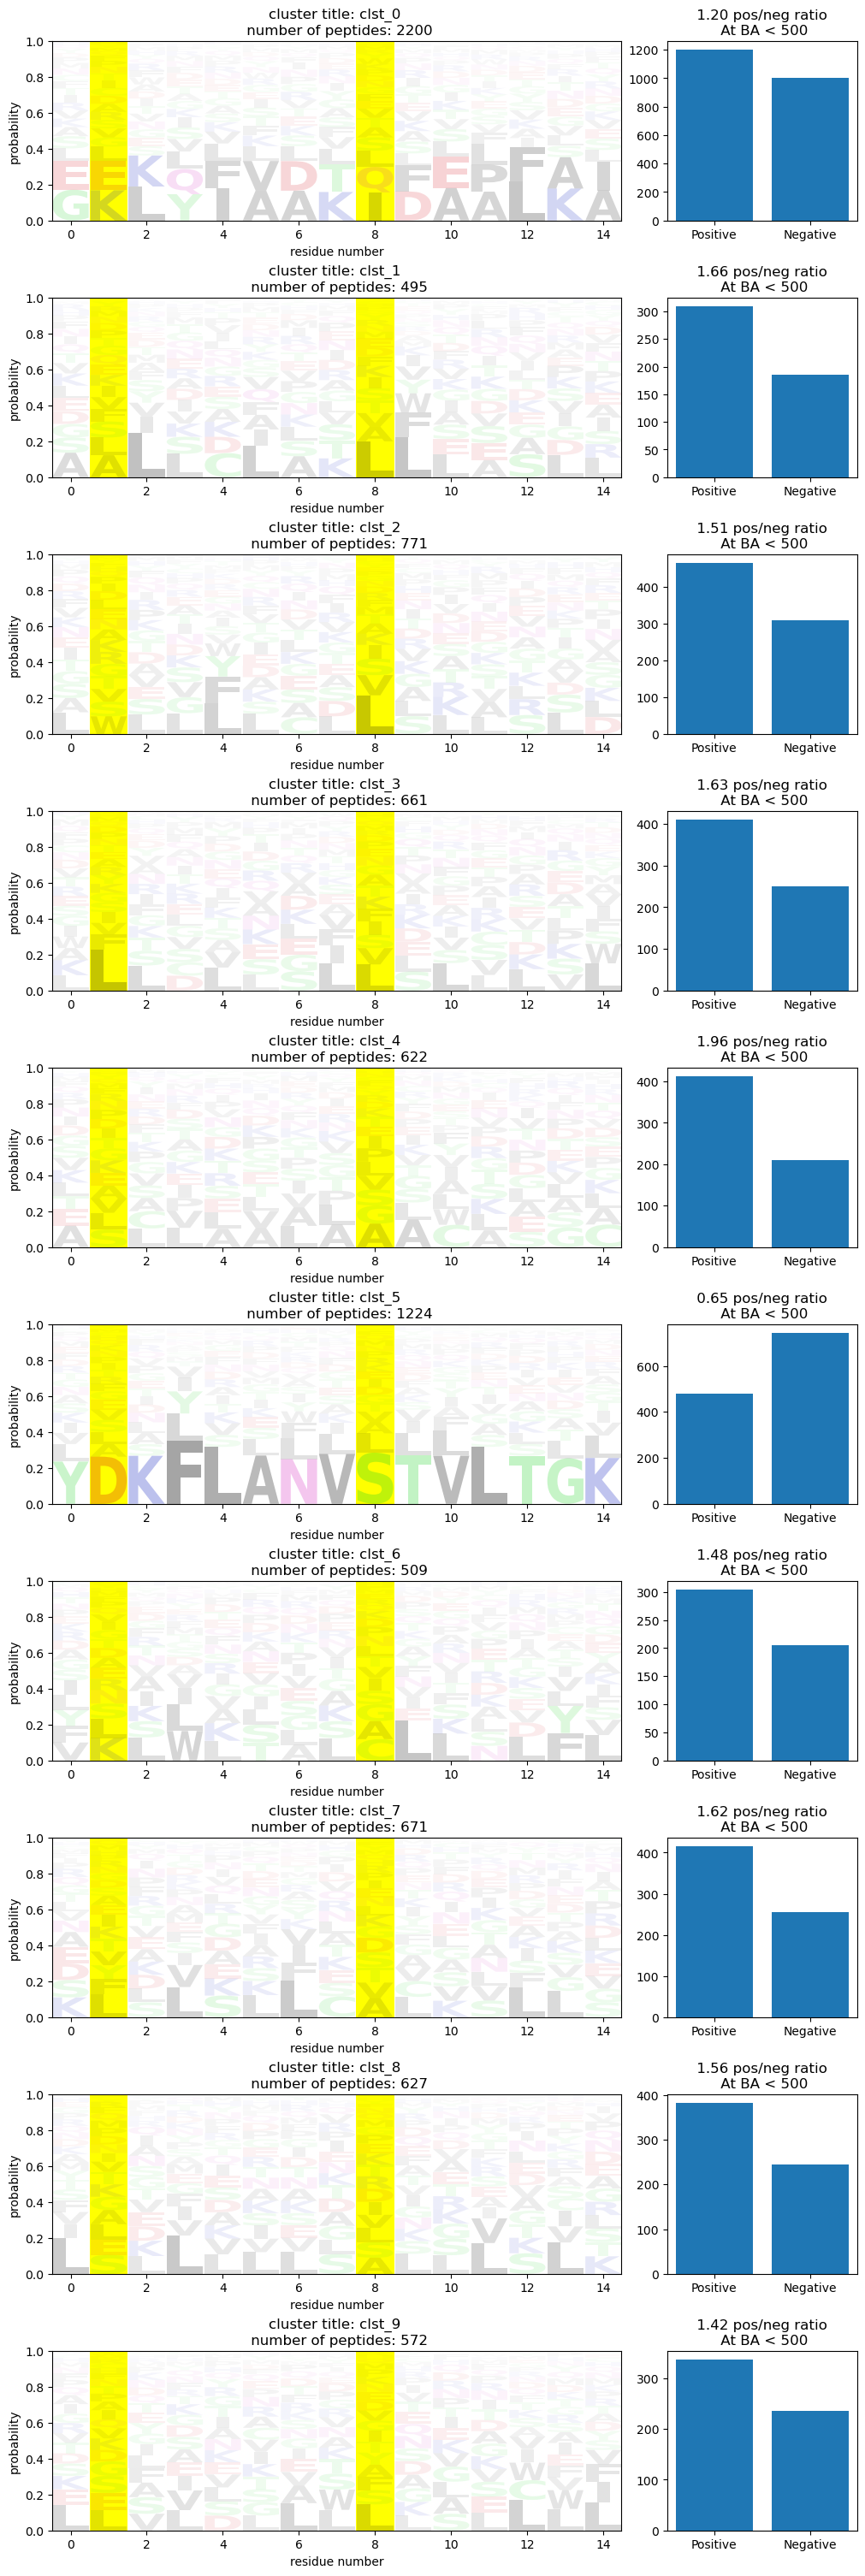

In [7]:
#Load and plot standard clusters
clusters = pickle.load(open("/projects/0/einf2380/data/external/processed/II/IDs_BA_DRB0101_MHCII_15mers_PAM250_10_clusters.pkl", "rb"))

plot_clusters_logos(clusters, rows)

8354


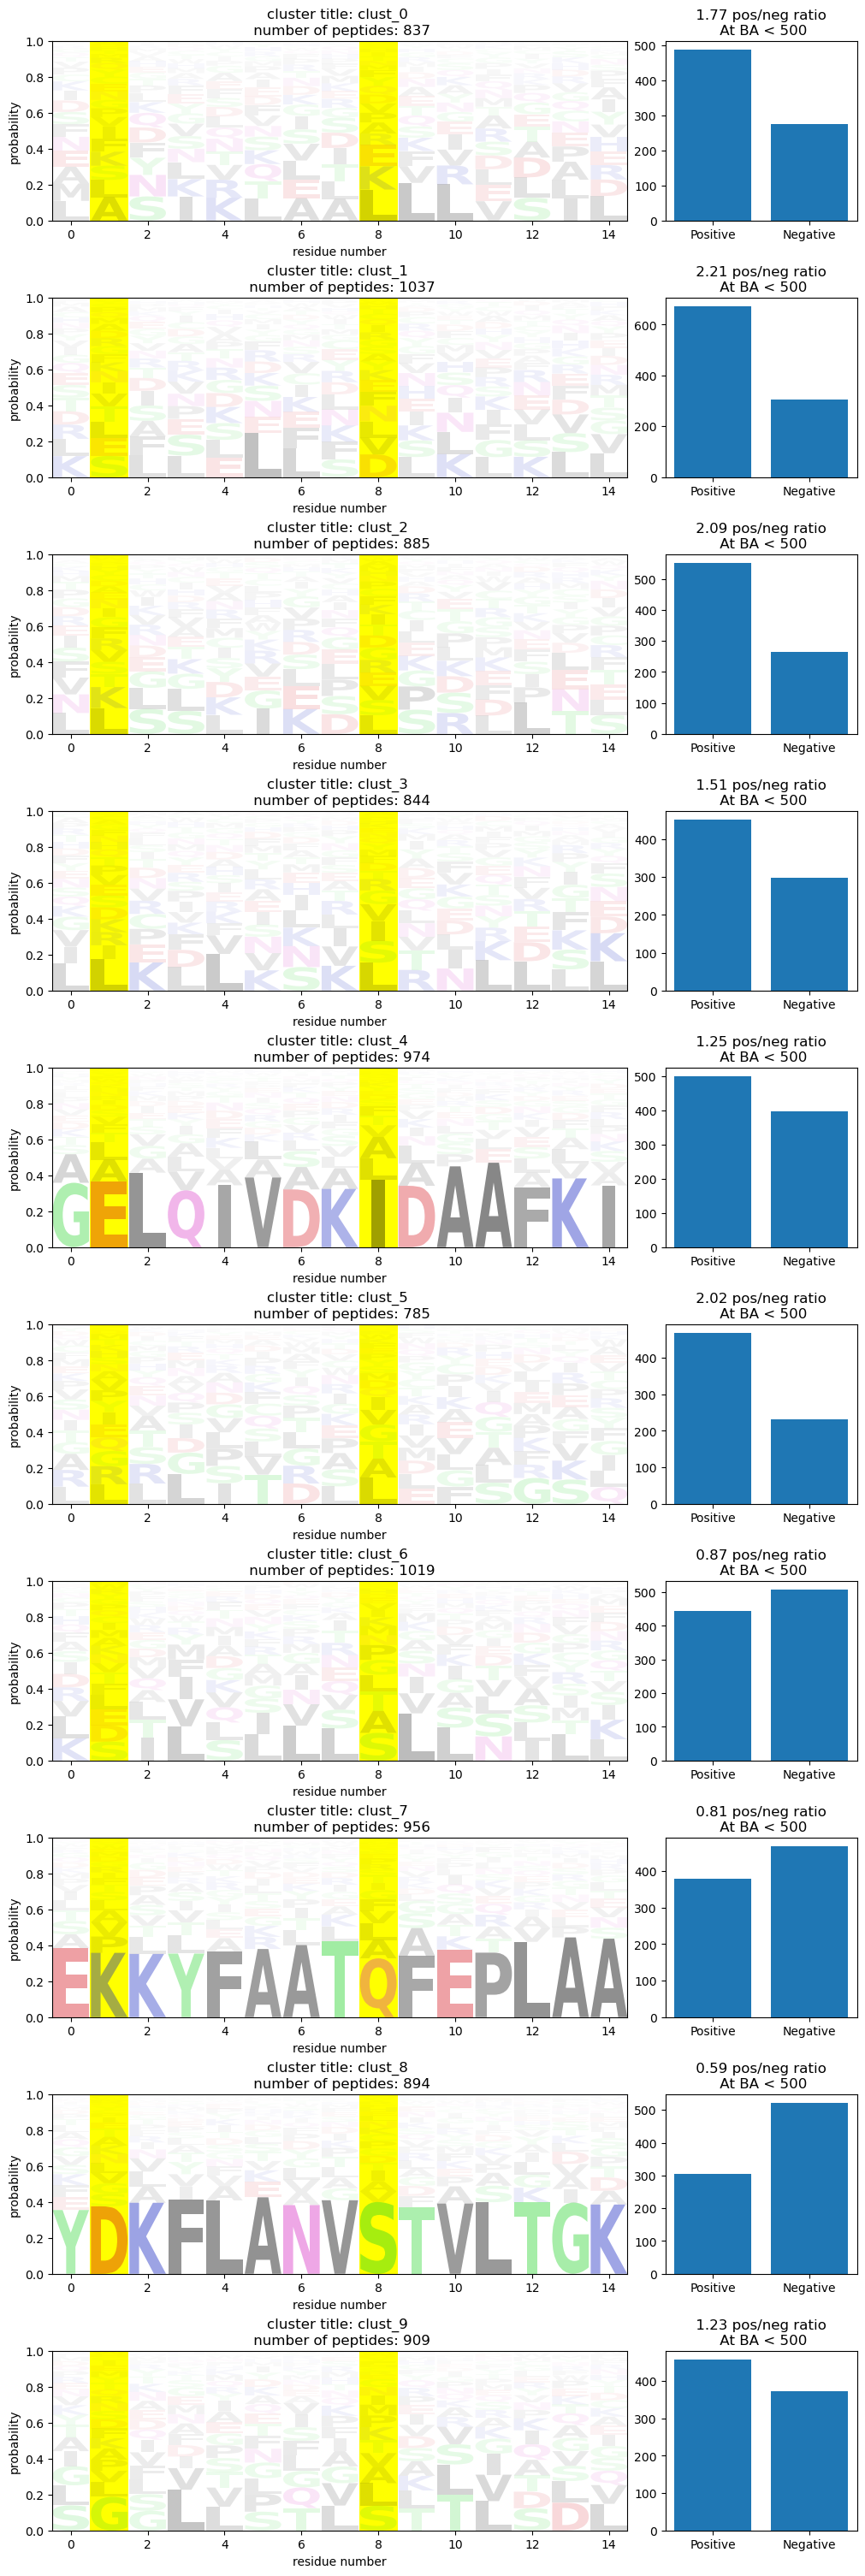

In [8]:
#Load and plot gibbs clusters

clusters = pickle.load(open('../../data/external/processed/IDs_BA_DRB10101_MHCII_PAM250_10_gibbscluster_clusters.pkl', 'rb'))
clusters = {x : clusters[x]['cores'] for x in clusters}

plot_clusters_logos(clusters, rows)